In [1]:
# import packages

import scipy.io as sio  # for loading matlab data

import numpy as np      # for numerical libs

from matplotlib.ticker import FuncFormatter # for custom bar plot labels

import matplotlib.pyplot as plt  # for plotting

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [2]:
data = sio.loadmat('GOOG_20141124.mat')

In [3]:
LOB = data['LOB']
# Limit Order Book

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO = np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

In [4]:
midprice = 0.5*(bid[:,0]+ask[:,0])

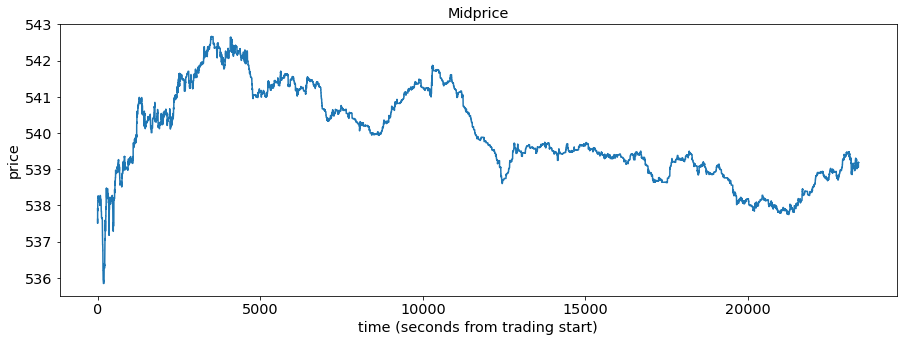

In [5]:
plt.plot(t, midprice)
plt.title('Midprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

In [6]:
microprice= (bid[:,0]*askvol[:,0]+ask[:,0]*bidvol[:,0])/(bidvol[:,0]+askvol[:,0])

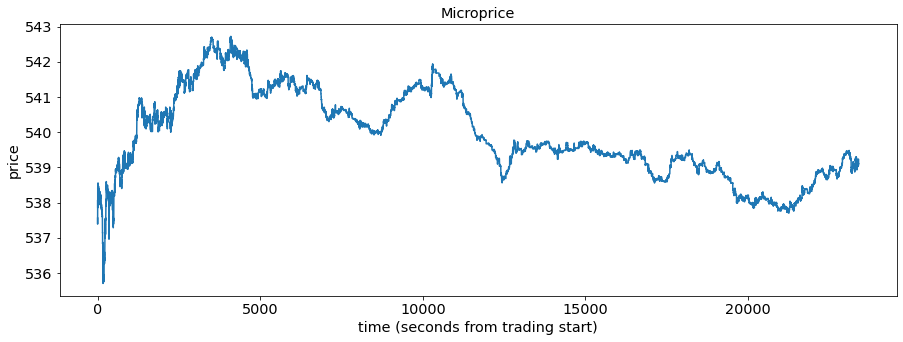

In [7]:
plt.plot(t, microprice)
plt.title('Microprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()


In [8]:
spread = ask[:,0]-bid[:,0]

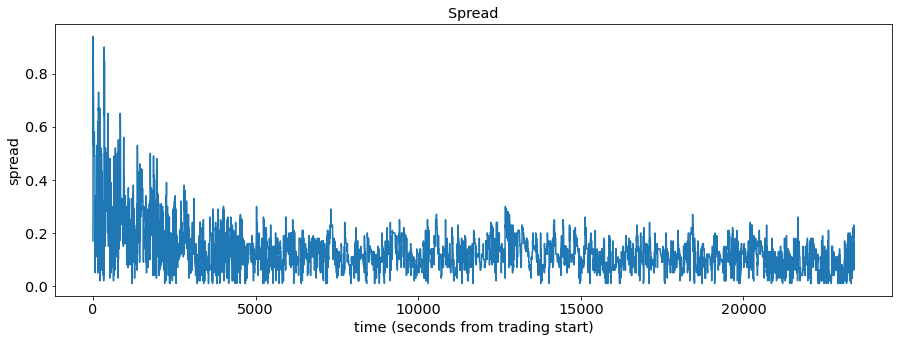

In [9]:
plt.plot(t,spread)
plt.title('Spread')
plt.ylabel('spread')
plt.xlabel('time (seconds from trading start)')
plt.show()

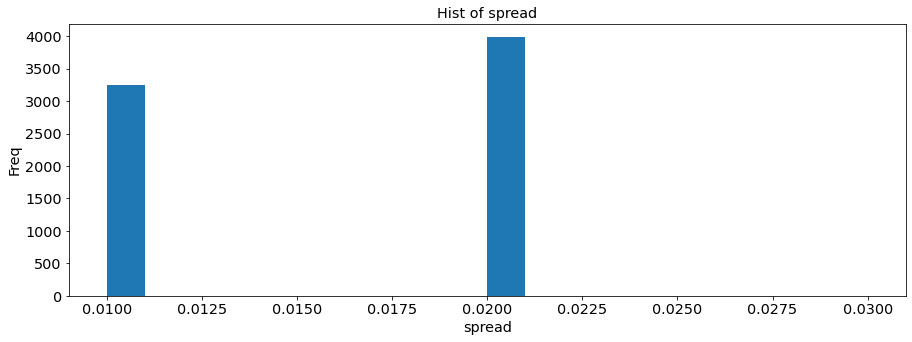

In [10]:
plt.hist(spread,bins=[0.01,0.02,0.03], width=0.001
         ,align='mid') 
plt.title("Hist of spread")
plt.xlabel(r'spread')
plt.ylabel('Freq')
plt.show()

In [11]:
rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

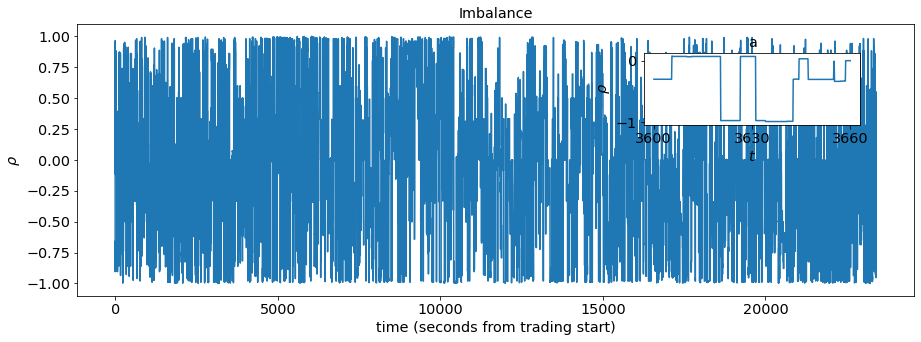

In [12]:
plt.plot(t, rho)
plt.title('Imbalance')
plt.ylabel(r'$\rho$')
plt.xlabel('time (seconds from trading start)')

a = plt.axes([.65, .6, .2, .2])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

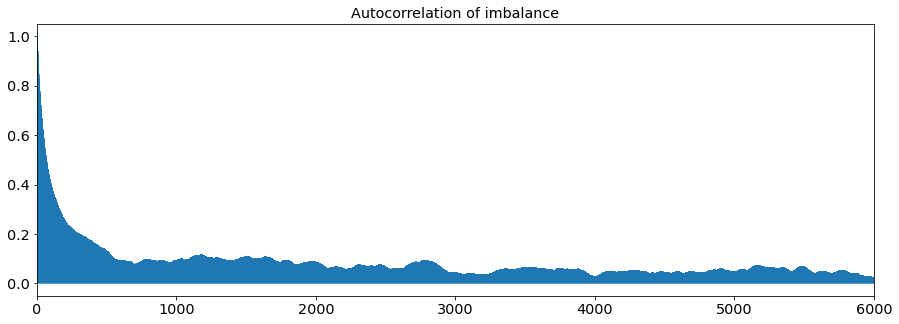

In [13]:
plt.acorr(rho[:,0]-np.mean(rho[:,0]),maxlags=6000)  # maximum one minute 
plt.title('Autocorrelation of imbalance')
plt.xlim([0,6000])
plt.show()

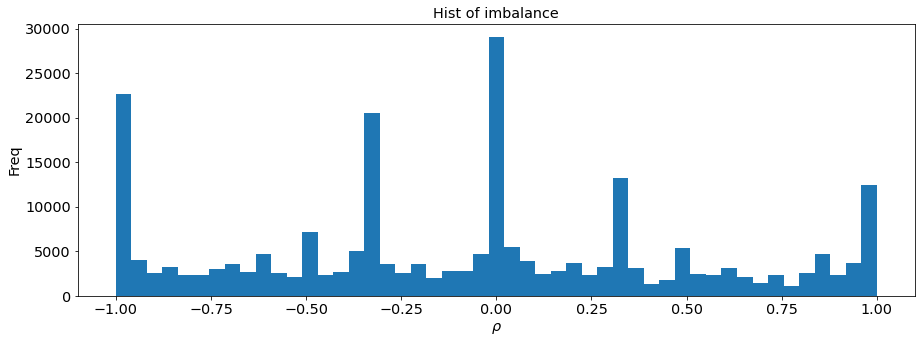

In [14]:
plt.hist(rho, bins=np.linspace(-1, 1, num=50)) 
plt.title("Hist of imbalance")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.show()

In [15]:
rho_MO = (MO[:,3]-MO[:,4])/(MO[:,3]+MO[:,4])

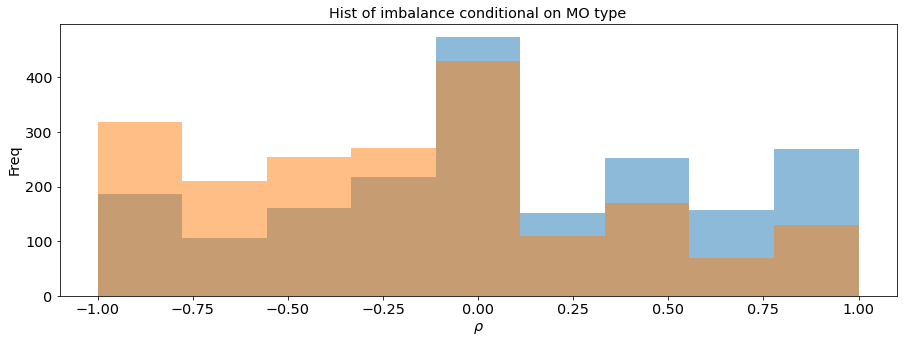

In [16]:
plt.hist(rho_MO[MO[:,7]==-1], bins=np.linspace(-1, 1, num=10),alpha=0.5)
plt.hist(rho_MO[MO[:,7]==+1], bins=np.linspace(-1, 1, num=10),alpha=0.5)
plt.title("Hist of imbalance conditional on MO type")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.show()

In [17]:
import pandas as pd

In [18]:
midprice = pd.DataFrame(midprice)

In [19]:
midprice.describe()

,0
count,234000.000000
mean,539.920772
std,1.244963
min,535.845000
25%,539.015000
50%,539.620000
75%,541.080000
max,542.670000


In [20]:
microprice = pd.DataFrame(microprice)

In [21]:
microprice.describe()

,0
count,234000.000000
mean,539.917036
std,1.249983
min,535.701613
25%,539.001569
50%,539.622870
75%,541.086957
max,542.722973


In [22]:
spread = pd.DataFrame(spread)

In [23]:
spread.describe()

,0
count,234000.000000
mean,0.129414
std,0.075450
min,0.010000
25%,0.080000
50%,0.120000
75%,0.160000
max,0.940000


In [24]:
rho = pd.DataFrame(rho)

In [25]:
rho.describe()

,0
count,234000.000000
mean,-0.078097
std,0.578891
min,-0.999730
25%,-0.500000
50%,-0.009901
75%,0.333333
max,0.999200


In [26]:
# parameters
S0 = 100 #trading speed is indepent of the stock price
N = 10 ** 7 #number of shares to liquidate;
T = 1; #terminal time;
k = 0.0003; #temporary price impact 
b = 0.0013 #permanent price impact
M = 1000;    #Number of trading times
alpha = 0.02;  #Terminal penalty
phi = 0.001; #Inventory penalty (cost of holding the shares)
sigma = 0.30; #Volatity but not relevant for trading speed

In [27]:
gamma = np.sqrt(phi/k);
xi = (alpha - 0.5 * b + np.sqrt(k * phi))/(alpha - 0.5 * b - np.sqrt(k * phi));

In [28]:
tt = np.linspace(0, 1, M + 1)

In [29]:
v = np.zeros((M + 1, 1))
q = np.zeros((M + 1, 1))
v[0] = 0
q[0] = N  
for t in range(1, M + 1): 
    v[t] = gamma * (xi * np.exp(gamma * (T-tt[t-1])) + np.exp(- gamma * (T-tt[t-1]))) / (xi * np.exp(gamma * (T-tt[t-1])) - np.exp(- gamma * (T-tt[t-1]))) * q[t-1] * T/M
    q[t] = (xi * np.exp(gamma * (T-tt[t-1])) - np.exp(- gamma * (T-tt[t-1]))) / (xi * np.exp(gamma * T) - np.exp(- gamma * T)) * N

Text(0.5, 1.0, 'Trading Speed')

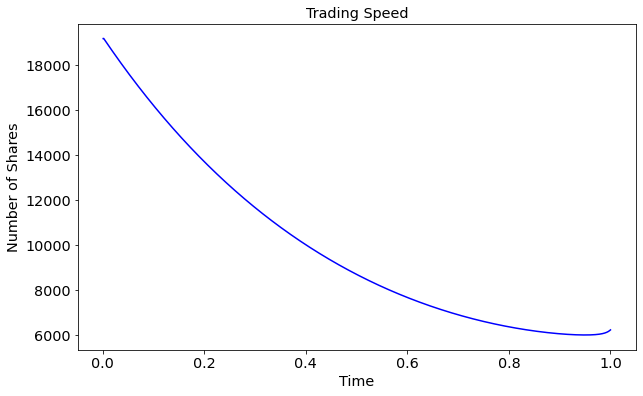

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], v[1:], 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.title('Trading Speed')

Text(0.5, 1.0, 'Inventory')

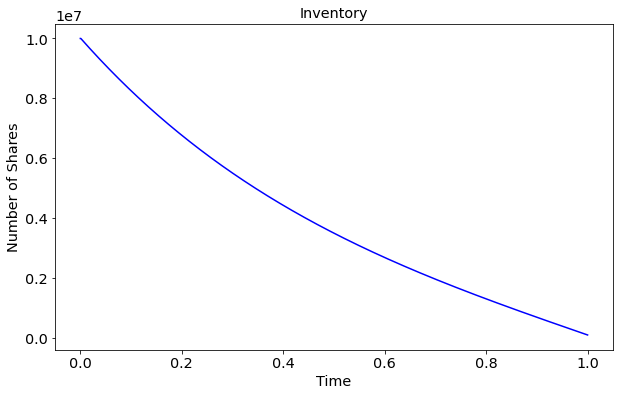

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(tt, q, 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.title('Inventory')

In [32]:
# Import necessary libraries.
import numpy as np
import import_ipynb
import Liquidation_Permanent_Price_Impact_helper as lppi_helpers

importing Jupyter notebook from Liquidation_Permanent_Price_Impact_helper.ipynb


In [33]:
# Parameter settings
R = 1000 # inventory size
T = 1 # the time horizon is from 0 to 1. 
Ndt = 6.5 * 3600
dt = T / Ndt
t = np.arange(0, T + dt, dt)

k = 0.0003 # temporary price impact parameter
b = 0.0013 # permanent price impact parameter

tau = T - t
tt = np.arange(0, 1 + 1 / 10, 1 / 10)

phi = 0.0012
myphi = np.array([1e-6, 0.0002, 0.002, 0.02])  # different variations of the running penalty parameter
symb = np.array(["o", "*", "+", "^"])

alpha = 0.05  # terminal liquidation penalty parameter
myalpha = np.array([0.002, 0.005, 0.02])  

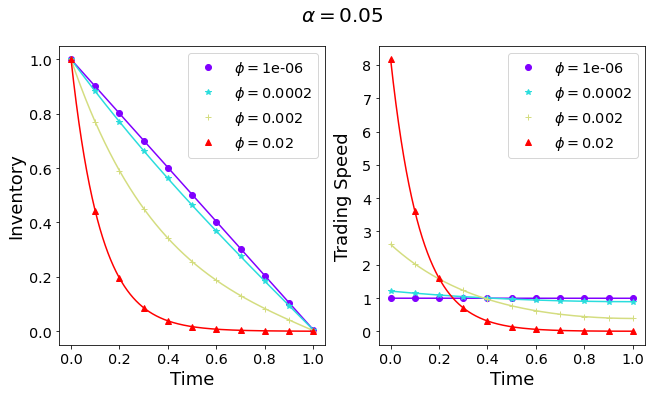

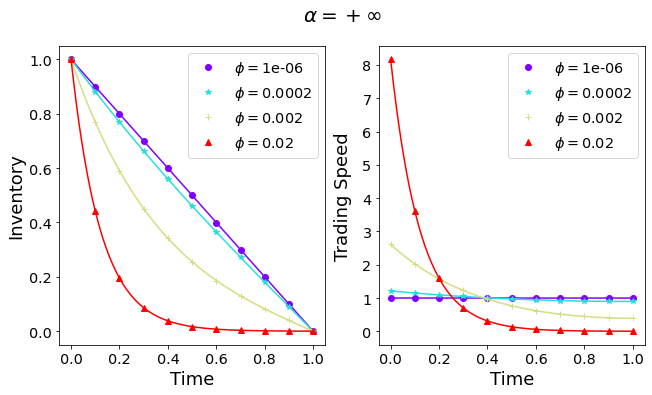

In [35]:
lppi_helpers.plot_inventory_trading_speed(0.05, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = 0.05$")
lppi_helpers.plot_inventory_trading_speed(1000, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = +\infty$")